<a href="https://colab.research.google.com/github/Akashpandey1507/telangana-tourism-EDA-Analysis/blob/main/Telangana_Tourirsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:

# Access the uploaded file
for filename, file_contents in uploaded.items():
    print(f'Uploaded file "{filename}" with length {len(file_contents)} bytes')


Uploaded file "Foreign Visitor Merge Data useed as Final Data (1).csv" with length 64646 bytes
Uploaded file "Domestic Visitors merge Data used as final_merge_data (1).csv" with length 63547 bytes


In [107]:
!pip install pyspark

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql import types as t


In [109]:
# Create a SparkSession
spark = SparkSession.builder.appName("MySparkSession").getOrCreate()

# Verify that the SparkSession is created successfully
print(spark)

In [110]:
df_domestic = spark.read.csv(
    "Domestic Visitors merge Data used as final_merge_data.csv",
               header=True,
               inferSchema=True
                             )

df_foreign = spark.read.csv(
    "Foreign Visitor Merge Data useed as Final Data.csv",
               header=True,
    inferSchema=True
    )

In [111]:
df1 = df_domestic.alias('copy')
df2 = df_foreign.alias('copy')

In [112]:
df1.show()

+--------------------+----------+---------+----+--------+
|            District|      Date|    Month|Year|Visitors|
+--------------------+----------+---------+----+--------+
|            Adilabad|01-01-2016|  January|2016|  792136|
|            Adilabad|01-02-2016| February|2016|  937820|
|            Adilabad|01-03-2016|    March|2016|  582946|
|            Adilabad|01-04-2016|    April|2016|  341948|
|            Adilabad|01-05-2016|      May|2016|  252887|
|            Adilabad|01-06-2016|     June|2016|  368237|
|            Adilabad|01-07-2016|     July|2016|  447562|
|            Adilabad|01-08-2016|   August|2016|  614285|
|            Adilabad|01-09-2016|September|2016|  491279|
|            Adilabad|01-10-2016|  October|2016|   94184|
|            Adilabad|01-11-2016| November|2016|   99148|
|            Adilabad|01-12-2016| December|2016|   53125|
|Bhadradri Kothagu...|01-01-2016|  January|2016|       0|
|Bhadradri Kothagu...|01-02-2016| February|2016|       0|
|Bhadradri Kot

In [113]:
df1.count()

1512

In [114]:
df1.columns

['District', 'Date', 'Month', 'Year', 'Visitors']

In [115]:
df1.select([f.sum(f.col(column).isNull().cast('int')).alias(column) for column in df1.columns]).show()

+--------+----+-----+----+--------+
|District|Date|Month|Year|Visitors|
+--------+----+-----+----+--------+
|       0|   0|    0|   0|       0|
+--------+----+-----+----+--------+



In [116]:
df1.printSchema()

root
 |-- District: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Visitors: integer (nullable = true)



In [117]:
df1 = df1.withColumn("Year", f.col("Year").cast('int'))

In [118]:
date_format_input = "dd-MM-yyyy"
date_format_output = "yyyy-MM-dd HH:mm:ss"

# Parse the string into a timestamp
df1 = df1.withColumn('Date', f.to_timestamp(df1['Date'], date_format_input))

# Cast the timestamp to datetime data type
df1 = df1.withColumn('Date', df1['Date'].cast(t.TimestampType()))


In [119]:
df1.printSchema()

root
 |-- District: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Visitors: integer (nullable = true)



In [120]:
df1.show()

+--------------------+-------------------+---------+----+--------+
|            District|               Date|    Month|Year|Visitors|
+--------------------+-------------------+---------+----+--------+
|            Adilabad|2016-01-01 00:00:00|  January|2016|  792136|
|            Adilabad|2016-02-01 00:00:00| February|2016|  937820|
|            Adilabad|2016-03-01 00:00:00|    March|2016|  582946|
|            Adilabad|2016-04-01 00:00:00|    April|2016|  341948|
|            Adilabad|2016-05-01 00:00:00|      May|2016|  252887|
|            Adilabad|2016-06-01 00:00:00|     June|2016|  368237|
|            Adilabad|2016-07-01 00:00:00|     July|2016|  447562|
|            Adilabad|2016-08-01 00:00:00|   August|2016|  614285|
|            Adilabad|2016-09-01 00:00:00|September|2016|  491279|
|            Adilabad|2016-10-01 00:00:00|  October|2016|   94184|
|            Adilabad|2016-11-01 00:00:00| November|2016|   99148|
|            Adilabad|2016-12-01 00:00:00| December|2016|   53

In [123]:
top10_dict = df1.groupBy("District").agg(
    f.sum("Visitors").alias("Total_Visitors")
).orderBy("Total_Visitors", ascending=False).limit(10)

top10_dict.show()

+--------------------+--------------+
|            District|Total_Visitors|
+--------------------+--------------+
|           Hyderabad|      83900960|
|   Rajanna Sircilla |      41763276|
|    Warangal (Urban)|      30726603|
|     Yadadri Bhongir|      26893080|
|Bhadradri Kothagu...|      21600962|
|              Medak |      20542639|
|Jayashankar Bhoop...|      19632865|
|         Mahbubnagar|      17180118|
|              Nirmal|      13315796|
|            Jagtial |      11303514|
+--------------------+--------------+



In [124]:
top10_dict = top10_dict.toPandas()

<Axes: xlabel='District', ylabel='Total_Visitors'>

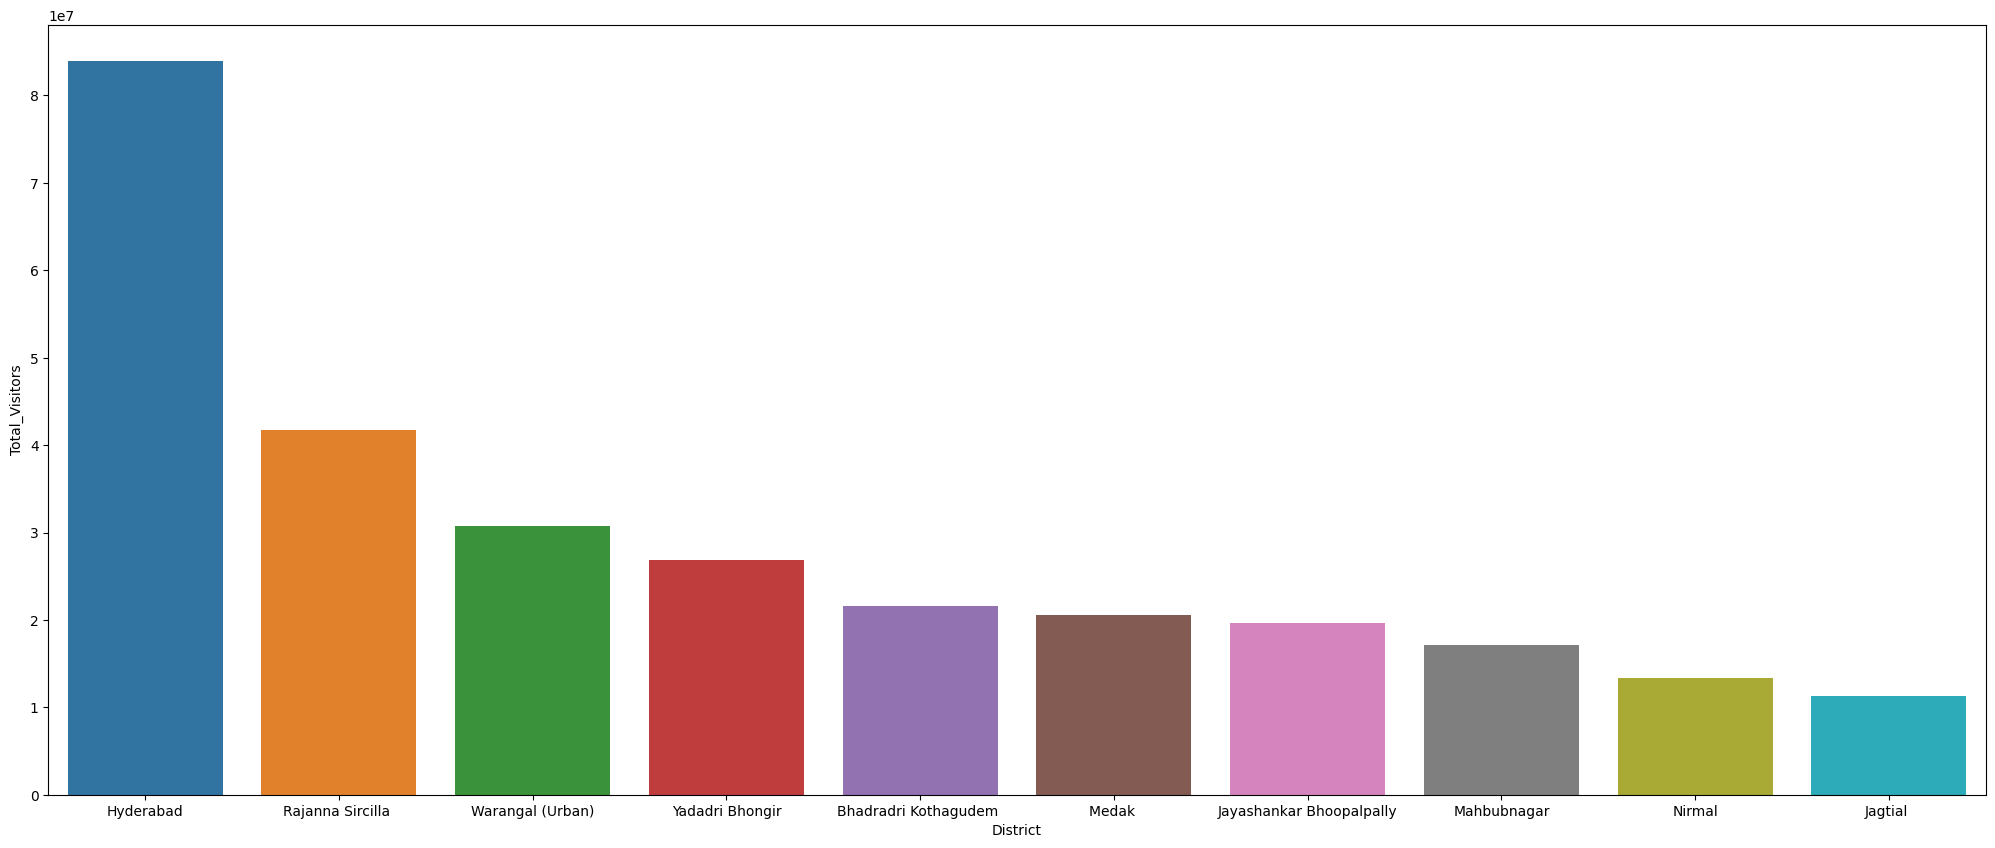

In [127]:
plt.figure(figsize=(25,10))

sns.barplot(data = top10_dict,
            x="District",
            y="Total_Visitors")